In [171]:
import warnings
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [172]:
Houses=pd.read_csv('Ames_HousePrice.csv',index_col=0)

In [173]:
Houses.describe(include='all')

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2580,2118.000000,2580.000000,2580,168,2580,...,2580.000000,2580.000000,9,525,97,2580.000000,2580.000000,2580.000000,2580,2580
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,4,...,NaN,NaN,4,4,4,NaN,NaN,NaN,10,6
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,...,NaN,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,NaN,2008,NaN,NaN,2570,105,1641,...,NaN,NaN,3,301,88,NaN,NaN,NaN,2392,2414
mean,7.148300e+08,1486.039922,178059.623256,57.691860,NaN,68.516053,10120.153488,NaN,NaN,NaN,...,16.200388,1.662016,NaN,NaN,NaN,48.731395,6.150775,2007.838372,NaN,NaN
std,1.886626e+08,488.650181,75031.089374,42.802105,NaN,22.835831,8126.937892,NaN,NaN,NaN,...,56.824783,30.339396,NaN,NaN,NaN,498.725058,2.670647,1.312333,NaN,NaN
min,5.263011e+08,334.000000,12789.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,5.313630e+08,1112.000000,129975.000000,20.000000,NaN,57.000000,7406.750000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,5.354546e+08,1436.000000,159900.000000,50.000000,NaN,68.000000,9391.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,9.071811e+08,1733.000000,209625.000000,70.000000,NaN,80.000000,11494.000000,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [174]:
#The target dependent varibale for this case is SalePrice column in House_Main table. In order to do some initial analysis, 
#we find columns that are of numeric type first.
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Houses_num=Houses.select_dtypes(include=numerics)

In [175]:
#Fill NAs in these columns with mean
for column in ["MasVnrArea","TotalBsmtSF",'BsmtFinSF1','BsmtFinSF2','GarageArea']:
    Houses_num[column]=Houses_num[column].fillna(Houses_num[column].mean())

C:\Users\rauna\AppData\Local\Temp/ipykernel_5328/2830205093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Houses_num[column]=Houses_num[column].fillna(Houses_num[column].mean())


In [176]:
#Fill NAs in these columns with median because it's more approirate 
#i.e. number of bathrooms/cars in interger 
for column in ["BsmtFullBath","BsmtHalfBath",'GarageYrBlt','GarageCars']:
    Houses_num[column]=Houses_num[column].fillna(Houses_num[column].median())

C:\Users\rauna\AppData\Local\Temp/ipykernel_5328/328557775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Houses_num[column]=Houses_num[column].fillna(Houses_num[column].median())


In [177]:
#Fill median value of lot frontage grouped by neighborhood 
Houses.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.5
ClearCr    81.0
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    72.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    70.0
Somerst    72.0
StoneBr    60.0
Timber     81.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [178]:
Houses.loc[Houses["Neighborhood"].isin(['Landmrk','GrnHill'])]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
110,916253320,1502,330000,120,RM,NaN,9763,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2007,WD,Normal
684,916252170,1295,230000,120,RM,NaN,8239,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal
205,907230240,1320,137000,160,RH,NaN,3612,Pave,NaN,IR1,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal


In [179]:
#Impute missing values in LotFrontage with the median by Neighborhood 
Houses_num["LotFrontage"] = Houses_num["LotFrontage"].fillna(Houses.groupby("Neighborhood")['LotFrontage'].transform('median'))

C:\Users\rauna\AppData\Local\Temp/ipykernel_5328/2484343169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Houses_num["LotFrontage"] = Houses_num["LotFrontage"].fillna(Houses.groupby("Neighborhood")['LotFrontage'].transform('median'))


In [180]:
#Fill the remaining 3NAs of LotFrontage with the Median of all LotFrontage
Houses_num["LotFrontage"]=Houses_num["LotFrontage"].fillna(Houses_num["LotFrontage"].median())

C:\Users\rauna\AppData\Local\Temp/ipykernel_5328/2642781839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Houses_num["LotFrontage"]=Houses_num["LotFrontage"].fillna(Houses_num["LotFrontage"].median())


In [181]:
Houses_num.select_dtypes("number").isna().sum()

PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        1
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [182]:
#PID is not useful as it's working as an ID index, we drop that column
Houses_num=Houses_num.drop(['PID'],axis=1)

In [183]:
#Get all the columns whose dtypes are not numeric, i.e. object
House_obj=Houses.select_dtypes(exclude=numerics)
House_obj.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [184]:
House_obj.isnull().sum(axis=0) #From the list below, we know some object variables have null-type values.

MSZoning            0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinType2       70
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu      1241
GarageType        127
GarageFinish      129
GarageQual        129
GarageCond        129
PavedDrive          0
PoolQC           2571
Fence            2055
MiscFeature      2483
SaleType            0
SaleCondition       0
dtype: int64

In [185]:
#Subset the House_Main_Nonnum columns that do not have nan values
House_obj_Init=House_obj[House_obj.columns[~House_obj.isnull().any()]]

House_obj_Init.isnull().sum(axis=0)

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
KitchenQual      0
Functional       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [186]:
#We do a value counts here to make sure words are not used to represent numbers (like 'One', 'Two', ...) If there are we 
#could just replace with integers. (The result shows none)
House_obj_Init.value_counts

<bound method DataFrame.value_counts of     MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
1         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
2         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
3    C (all)   Pave      Reg         Lvl    AllPub    Inside       Gtl   
4         RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
5         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
..       ...    ...      ...         ...       ...       ...       ...   
759       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
760       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
761       RH   Pave      Reg         HLS    AllPub    Inside       Gtl   
762       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
763       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2  ... ExterCond Foundation Heatin

In [187]:
#Making sure there's no empty cells in the columns of House_Main_Nonnum_Init
for col in House_obj_Init:
    print(col,(House_obj_Init[col].values=='').sum())

MSZoning 0
Street 0
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
ExterQual 0
ExterCond 0
Foundation 0
Heating 0
HeatingQC 0
CentralAir 0
KitchenQual 0
Functional 0
PavedDrive 0
SaleType 0
SaleCondition 0


In [188]:
for col in House_obj_Init:
    print(col,House_obj_Init[col].unique())

MSZoning ['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR3' 'IR2']
LandContour ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities ['AllPub' 'NoSewr']
LotConfig ['Corner' 'Inside' 'FR2' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['SWISU' 'Edwards' 'IDOTRR' 'OldTown' 'NWAmes' 'Blmngtn' 'Mitchel'
 'NridgHt' 'NAmes' 'CollgCr' 'SawyerW' 'MeadowV' 'BrDale' 'Gilbert'
 'Timber' 'Somerst' 'BrkSide' 'NoRidge' 'Sawyer' 'Crawfor' 'Greens'
 'ClearCr' 'GrnHill' 'StoneBr' 'Veenker' 'NPkVill' 'Blueste' 'Landmrk']
Condition1 ['Norm' 'RRAn' 'PosN' 'Artery' 'RRAe' 'Feedr' 'PosA' 'RRNn' 'RRNe']
Condition2 ['Norm' 'PosN' 'Feedr' 'Artery' 'PosA' 'RRNn' 'RRAn' 'RRAe']
BldgType ['1Fam' 'TwnhsE' '2fmCon' 'Twnhs' 'Duplex']
HouseStyle ['1Story' '2Story' 'SFoyer' 'SLvl' '1.5Fin' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Mansard' 'Gambrel' 'Flat' 'Shed']
RoofMatl ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl' 'Metal' 'Roll' 'Membran']
Exterior1st ['Wd Sdn

In [189]:
for col in House_obj_Init:
    print(House_obj_Init[col].value_counts())

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64
Pave    2570
Grvl      10
Name: Street, dtype: int64
Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64
Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64
AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64
Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk 

In [190]:
#From the above tables we could handle different columns as follows:
# MSZoning: Group C, I, A into 'non-residential'
# HeatingQC, KitchenQual: Group Fa, Po into 'Ba' as 'Below Average'
Drop=['Street', 'Utilities','Condition2', 'RoofMatl', 'SaleType', 'SaleCondition']
# Keep: LandContour, BldgType, ExterQual, ExterCond, Foundation, PavedDrive
# LotConfig: Group FR2 and FR3 into 'Frontage'
# Convert to binary: LotShape, LandSlope, Condition1, Heating, CentralAir, Functional
# Use .75 Threshold: Neiborhood, Exterior1st, Exterior2nd
# Use .90 Threshold: HouseStyle, RoofStyle

In [191]:
House_obj_Init.shape

(2580, 27)

In [192]:
#Dropping columns
House_obj_Init=House_obj_Init.drop(Drop,axis=1)
House_obj_Init.shape

(2580, 21)

In [193]:
#MSZoning: Group C, I, A into 'non-residential'
#House_Main_Nonnum_Init['MSZoning']=
House_obj_Init['MSZoning']=House_obj_Init['MSZoning'].apply(lambda x: 
                                         'Non-residential' if x=='C (all)'
                                         else 'Non-residential' if x=='I (all)' 
                                         else 'Non-residential' if x=='A (agr)' 
                                         else 'RL' if x=='RL' 
                                         else 'RM' if x=='RM'
                                         else 'FV' if x=='FV'
                                         else 'RH')           

In [194]:
# HeatingQC, KitchenQual: Group Fa, Po into 'Ba' as 'Below Average'
House_obj_Init['HeatingQC']=House_obj_Init['HeatingQC'].str.replace('Fa','Ba').str.replace('Po','Ba')

In [195]:
# LotConfig: Group FR2 and FR3 into 'Frontage'
for i in range(len(House_obj_Init['LotConfig'])):
    if (House_obj_Init['LotConfig'].iloc[i] == 'FR2') or (House_obj_Init['LotConfig'].iloc[i] == 'FR3'):
        House_obj_Init['LotConfig'].iloc[i]='Frontage'

In [196]:
# Convert to binary: LotShape, LandSlope, Condition1, Heating, CentralAir, Functional

#LotShape:
House_obj_Init['LotShape']=House_obj_Init['LotShape'].map(lambda x: 1 if x=='Reg' else 0)
House_obj_Init['LotShape'].value_counts()

1    1641
0     939
Name: LotShape, dtype: int64

In [197]:
#LandSlope:
House_obj_Init['LandSlope']=House_obj_Init['LandSlope'].map(lambda x: 1 if x=='Gtl' else 0)
House_obj_Init['LandSlope'].value_counts()

1    2458
0     122
Name: LandSlope, dtype: int64

In [198]:
#Condition1
House_obj_Init['Condition1']=House_obj_Init['Condition1'].map(lambda x: 1 if x=='Norm' else 0)
House_obj_Init['Condition1'].value_counts()

1    2228
0     352
Name: Condition1, dtype: int64

In [199]:
#Heating
House_obj_Init['Heating']=House_obj_Init['Heating'].map(lambda x: 1 if ((x=='GasA') or (x=='GasW')) else 0)
House_obj_Init['Heating'].value_counts()

1    2565
0      15
Name: Heating, dtype: int64

In [200]:
#CentralAir
House_obj_Init['CentralAir']=House_obj_Init['CentralAir'].map(lambda x: 1 if x=='Y' else 0)
House_obj_Init['CentralAir'].value_counts()

1    2417
0     163
Name: CentralAir, dtype: int64

In [201]:
#Functional
House_obj_Init['Functional']=House_obj_Init['Functional'].map(lambda x: 1 if x=='Typ' else 0)
House_obj_Init['Functional'].value_counts()

1    2399
0     181
Name: Functional, dtype: int64

In [202]:
#Use .75 Threshold: Neiborhood, Exterior1st, Exterior2nd

def cumulatively_categorise(column,threshold=0.75):
        #Find the threshold value using the percentage and number of observations in the column
        threshold_value=int(threshold*len(column))
        #Initialise an empty list for our new minimised categories
        categories_list=[]
        #Initialise a variable to calculate the sum of frequencies
        s=0
        #Create a counter dictionary of the form unique_value: frequency
        counts=Counter(column)

        #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
        for i,j in counts.most_common():
        #Add the frequency to the global sum
          s+=dict(counts)[i]
        #Append the category name to the list
          categories_list.append(i)
        #Check if the global sum has reached the threshold value, if so break the loop
          if s>=threshold_value:
                break
        
        #Replace all instances not in our new categories by Other  
        column=column.apply(lambda x: x if x in categories_list else 'Other')
        
        return column

In [203]:
#Call the function with a default threshold of 75%

Treshold_75=['Neighborhood','Exterior1st', 'Exterior2nd']
for col in Treshold_75:
    House_obj_Init[col]=cumulatively_categorise(House_obj_Init[col])
print(House_obj_Init['Neighborhood'].value_counts())
print(House_obj_Init['Exterior1st'].value_counts())
print(House_obj_Init['Exterior2nd'].value_counts())

Other      567
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Gilbert    143
Somerst    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Name: Neighborhood, dtype: int64
VinylSd    868
Other      504
HdBoard    416
MetalSd    407
Wd Sdng    385
Name: Exterior1st, dtype: int64
VinylSd    856
Other      571
MetalSd    404
HdBoard    380
Wd Sdng    369
Name: Exterior2nd, dtype: int64


In [204]:
#Call the function with a default threshold of 90%

Treshold_90=['HouseStyle', 'RoofStyle']
for col in Treshold_90:
    House_obj_Init[col]=cumulatively_categorise(House_obj_Init[col],threshold=0.90)
print(House_obj_Init['HouseStyle'].value_counts())
print(House_obj_Init['RoofStyle'].value_counts())

1Story    1288
2Story     773
1.5Fin     284
Other      235
Name: HouseStyle, dtype: int64
Gable    2059
Hip       473
Other      48
Name: RoofStyle, dtype: int64


In [205]:
#Dummy-Encoding Process:

Binary=['LotShape', 'LandSlope', 'Condition1', 'Heating', 'CentralAir', 'Functional']
Dummy=pd.get_dummies(House_obj_Init.loc[:,~House_obj_Init.columns.isin(Binary)],drop_first=True)
House_obj_Init=House_obj_Init[Binary]
House_obj_Init=pd.concat([House_obj_Init,Dummy],axis=1)
House_obj_Init.columns

Index(['LotShape', 'LandSlope', 'Condition1', 'Heating', 'CentralAir',
       'Functional', 'MSZoning_Non-residential', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_Frontage', 'LotConfig_Inside',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Other',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'HouseStyle_Other', 'RoofStyle_Hip', 'RoofStyle_Other',
       'Exterior1st_MetalSd', 'Exterior1st_Other', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior2nd_MetalSd', 'Exterior2nd_Other',
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdn

In [243]:
Houses.isnull().sum(axis=0).sort_values(ascending=False)

PoolQC           2571
MiscFeature      2483
Alley            2412
Fence            2055
FireplaceQu      1241
                 ... 
GrLivArea           0
Heating             0
HeatingQC           0
CentralAir          0
SaleCondition       0
Length: 81, dtype: int64

In [207]:
#Dropping some numerical/Categorical columns because they have too many NaN values and NaN doesn't mean 
#anything in those columns:
Num_Drop=['BsmtUnfSF']
Houses_num=Houses_num.drop(Num_Drop,axis=1)

In [208]:
#Merge tables to create a ML table
ML_df=pd.concat([House_obj_Init,Houses_num],axis=1)

In [209]:
ML_df_x=ML_df.loc[:,~ML_df.columns.isin(['SalePrice'])]
ML_df_y=ML_df['SalePrice']

In [210]:
#Now we find all NaN values before we build our model
NaN=[]
for col in ML_df_x.columns:
    if ML_df_x[col].isnull().sum(axis=0)>0:
        NaN.append(col)

In [211]:
for i in NaN:
    print(i,ML_df_x[i].values)

In [212]:
ML_df_x['LotFrontage'].unique()

array([ 60. ,  42. ,  80. ,  70. ,  64. ,  53. ,  74. ,  35. ,  48. ,
        63. ,  62. ,  73. ,  50. ,  68. ,  45. ,  65. ,  21. ,  58. ,
        72. , 105. , 100. ,  88. ,  52. ,  89. ,  71. ,  76. , 101. ,
        59. ,  56. ,  32. ,  78. , 110. ,  96. ,  61. , 108. ,  75. ,
       106. ,  84. ,  67. , 168. ,  49. , 140. ,  66. ,  92. , 125. ,
        85. ,  81. ,  24. ,  79. , 130. ,  77. ,  94. ,  91. ,  90. ,
        82. , 149. ,  43. ,  69. ,  95. ,  40. ,  51. ,  47. ,  22. ,
        38. , 118. ,  87. ,  86. ,  54. ,  39. ,  41. ,  30. , 128. ,
        46. ,  99. ,  44. ,  36. , 107. , 104. ,  34. ,  57. , 113. ,
       120. , 115. , 150. , 116. ,  37. , 129. ,  98. , 121. , 195. ,
       160. ,  83. , 102. ,  93. ,  55. , 124. , 131. ,  33. , 137. ,
       111. , 134. ,  51.5,  26. , 103. , 313. ,  28. , 114. , 174. ,
       141. , 117. ,  25. , 112. , 155. , 109. , 152. , 153. , 122. ,
        31. , 126. ,  97. , 200. , 136. , 119. , 135. , 144. , 123. ,
       138. ])

In [213]:
from sklearn.impute import SimpleImputer #iteratative imputer
Missing=SimpleImputer(strategy='mean')
Missing=Missing.fit(ML_df_x)
ML_df_x=Missing.transform(ML_df_x.values)

In [214]:
# Preprocessing (Encoding and pipelining)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder # Since target_encoder uses the output variable to determine encoding,
#I will use careful techniques to not produce Data Leakage. 
from sklearn.compose import make_column_transformer # this will help with our pipeline and applying differet 
#encoding techniques for different columns
from sklearn.pipeline import make_pipeline # used for creating preprocessing and modeling pipeline
from sklearn.model_selection import cross_val_score # used for determining the average of different metrics 
#duriing our cross validation

#Pre-Processing (Handling Missing Data and imputing if necessary)

from sklearn.experimental import enable_iterative_imputer #enables iterative imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer,MissingIndicator

# Preprocessing (Encoding and pipelining)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder # Since target_encoder uses the output variable to determine encoding,
#I will use careful techniques to not produce Data Leakage. 
from sklearn.compose import make_column_transformer # this will help with our pipeline and applying differet 
#encoding techniques for different columns
from sklearn.pipeline import make_pipeline # used for creating preprocessing and modeling pipeline
from sklearn.model_selection import cross_val_score # used for determining the average of different metrics 
#duriing our cross validation

#Pre-Processing (Handling Missing Data and imputing if necessary)

from sklearn.experimental import enable_iterative_imputer #enables iterative imputer 
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer,MissingIndicator


#Models 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, HuberRegressor


In [215]:
ML_df['SalePrice']

1      126000
2      139500
3      124900
4      114000
5      227000
        ...  
759    121000
760    139600
761    145000
762    217500
763    215000
Name: SalePrice, Length: 2580, dtype: int64

In [216]:
X = ML_df.drop('SalePrice', axis = 1)
y = ML_df.SalePrice

In [217]:
!pip install mlxtend

In [218]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [219]:
lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=45, forward=False, verbose=1, scoring='neg_mean_squared_error')

In [220]:
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 101 out of 101 | elapsed:   13.0s finished
Features: 100/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.1s finished
Features: 99/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  99 out of  99 | elapsed:    9.7s finished
Features: 98/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  98 out of  98 | elapsed:   10.0s finished
Features: 97/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  97 out of  97 | elapsed:    9.2s finished
Features: 96/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    9.3s finished
Features: 95/45[Pa

[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    3.3s finished
Features: 51/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  51 out of  51 | elapsed:    2.9s finished
Features: 50/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.4s finished
Features: 49/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    2.8s finished
Features: 48/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    2.2s finished
Features: 47/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    2.1s finished
Features: 46/45[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Par

In [221]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)


['Condition1', 'Functional', 'MSZoning_RL', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'HeatingQC_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'ScreenPorch']


In [222]:
feature_cols = ['Condition1', 'Functional', 'MSZoning_RL', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'HeatingQC_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'ScreenPorch']

In [223]:
df_features = ML_df[['Condition1', 'Functional', 'MSZoning_RL', 'LandContour_HLS', 'LandContour_Lvl', 'LotConfig_CulDSac', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1Story', 'Exterior1st_Wd Sdng', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'HeatingQC_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GrLivArea', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'ScreenPorch']]

In [224]:
X.shape

(2580, 101)

In [225]:
df_features.isnull().sum(axis=0)

Condition1              0
Functional              0
MSZoning_RL             0
LandContour_HLS         0
LandContour_Lvl         0
LotConfig_CulDSac       0
Neighborhood_CollgCr    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NWAmes     0
Neighborhood_OldTown    0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
BldgType_Twnhs          0
BldgType_TwnhsE         0
HouseStyle_1Story       0
Exterior1st_Wd Sdng     0
Exterior2nd_VinylSd     0
Exterior2nd_Wd Sdng     0
ExterQual_Fa            0
ExterQual_Gd            0
ExterQual_TA            0
Foundation_CBlock       0
HeatingQC_TA            0
KitchenQual_Fa          0
KitchenQual_Gd          0
KitchenQual_TA          0
GrLivArea               0
LotArea                 0
OverallQual             0
OverallCond             0
YearBuilt               0
MasVnrArea              0
BsmtFinSF1              0
BsmtFinSF2              0
TotalBsmtSF             0
BsmtFullBath

In [235]:
X_train, X_test, y_train, y_test = train_test_split(df_features, np.log(y), test_size=.2, random_state=101)

In [236]:
X_train.shape

(2064, 45)

In [237]:
linregfeat = LinearRegression()

In [238]:
linregfeat.fit(X_train, y_train)

LinearRegression()

In [239]:
y_pred = linregfeat.predict(X_test)

In [240]:
from sklearn.metrics import r2_score, explained_variance_score
r2_score(y_test, y_pred)

0.9257671350935865

In [241]:
explained_variance_score(y_test, y_pred)

0.9257721900516278

C:\Users\rauna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Multi Linear Regression')

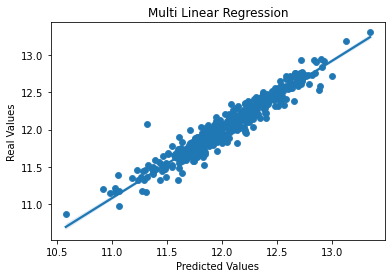

In [245]:
sns.scatterplot(y_test, y_pred)
sns.regplot(x = y_test,
           y=y_pred, data = y )
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
plt.title('Multi Linear Regression')
